<a href="https://colab.research.google.com/github/Menna167200/Classification-Models/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

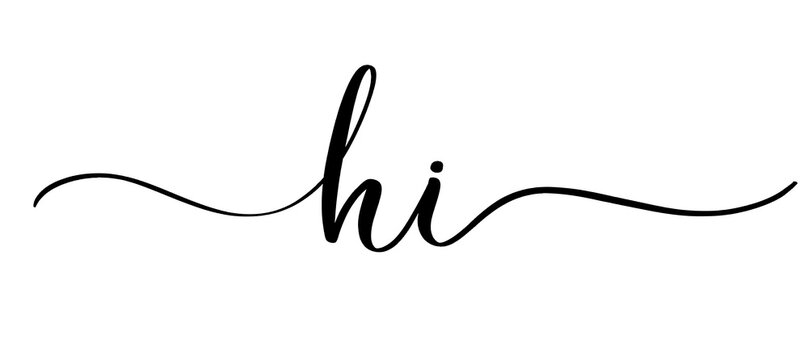

<font face="Rage" size=10 color='green' text-align='center'><i>  Breast Canser Project <i> <font>

---

>

>


>


<font face="Rage" size=7 color='black'><i> Loading libraries<i> <font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font face="Rage" size=7 color='black'><i>Loading data<i> <font>

In [2]:
from sklearn.datasets import load_breast_cancer
X = load_breast_cancer().data
y = load_breast_cancer().target
print(X.shape, y.shape)
print(X[:5], y[:5])

(569, 30) (569,)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-0

<font face="Rage" size=7 color='black'><i> Investigating The features' and Labels' names <i> <font>

In [3]:
print(load_breast_cancer().feature_names, load_breast_cancer().target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] ['malignant' 'benign']


<font face="Rage" size=7 color='black'><i> Select the best features <i> <font>

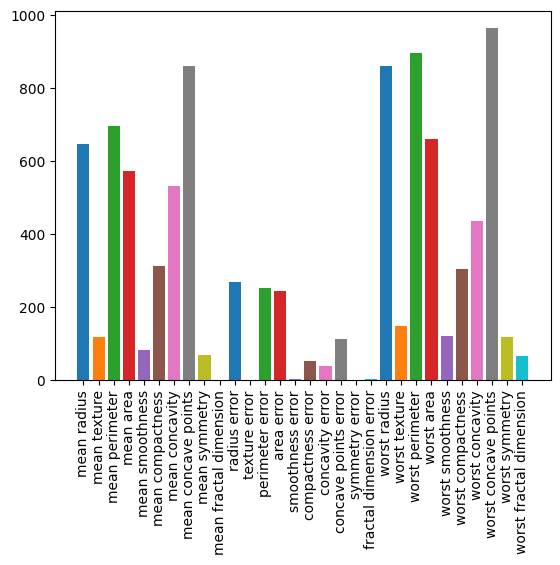

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)
for i,j in enumerate(selector.scores_):
    plt.bar(i,j)
plt.xticks(range(X.shape[1]), load_breast_cancer().feature_names, rotation=90)
plt.show()

<font face="Rage" size=7 color='black'><i>Heatmap <i> <font>

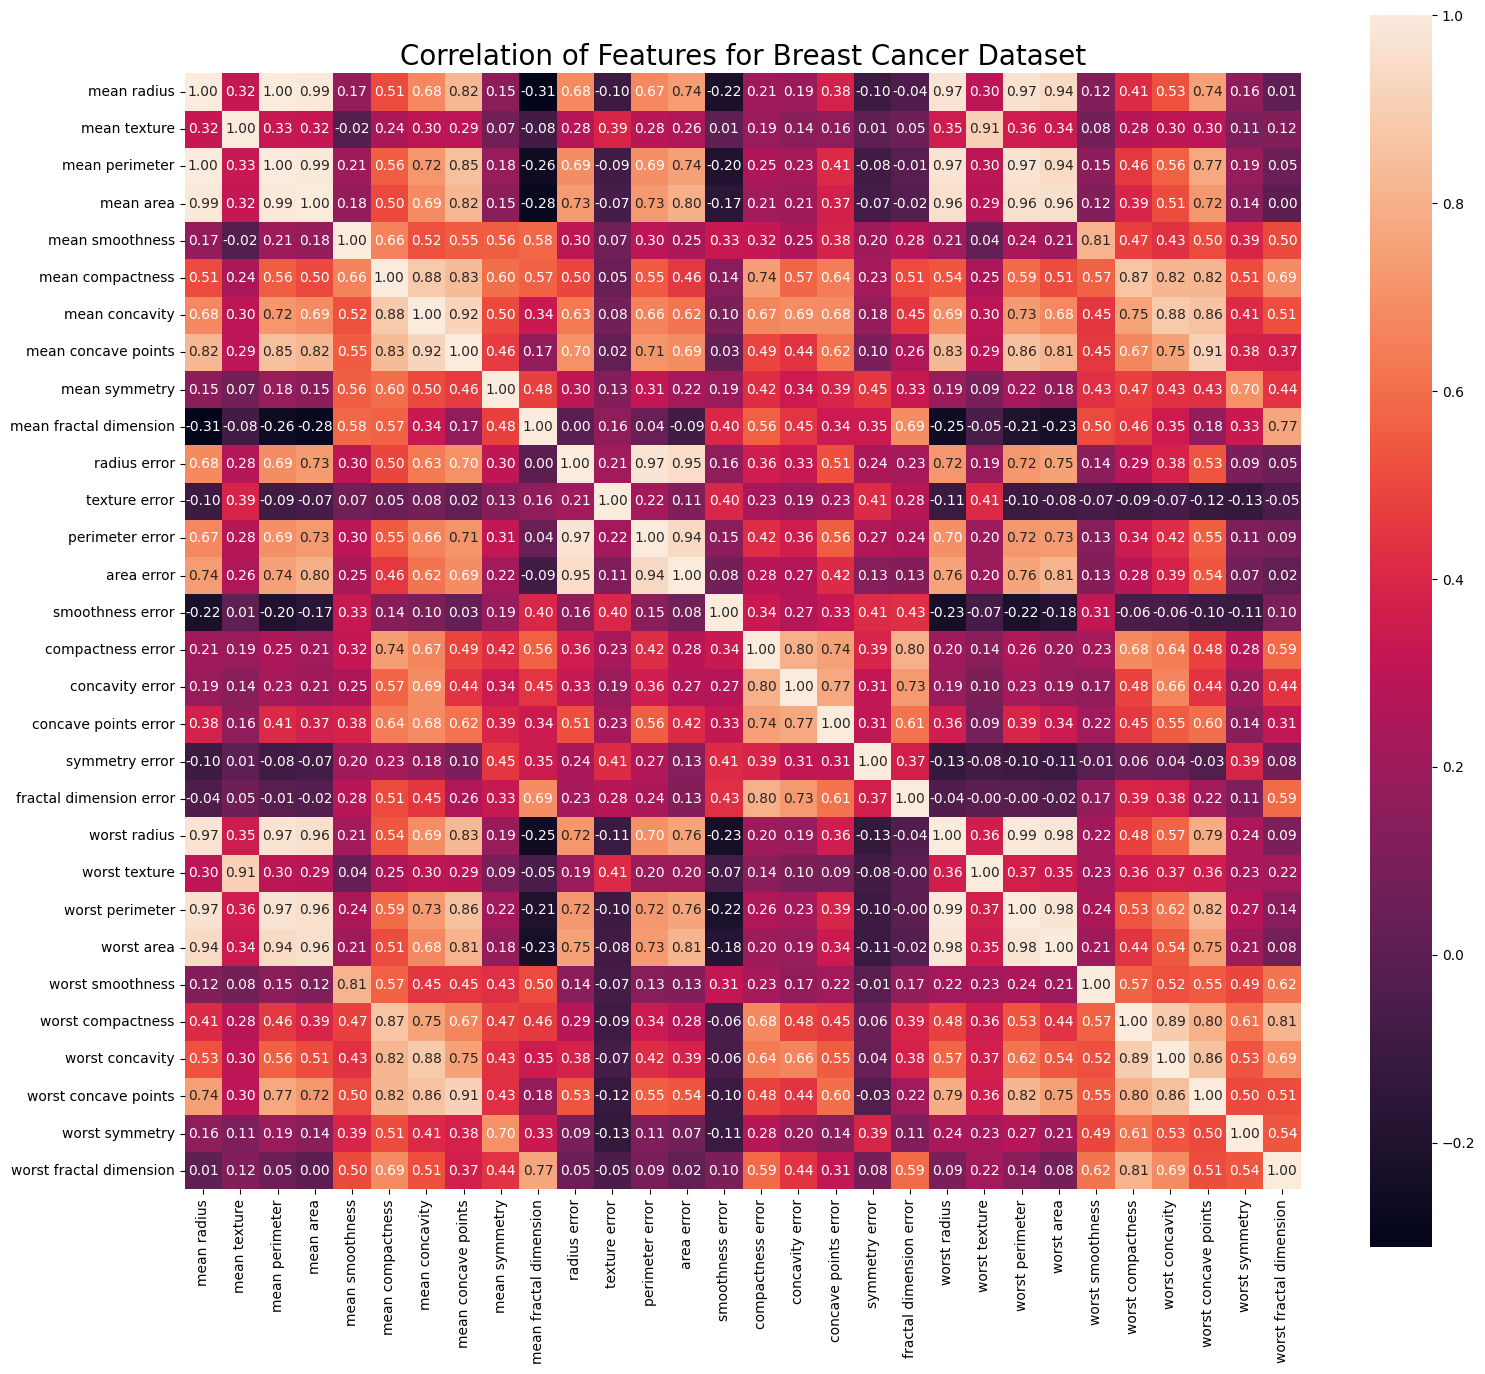

In [5]:
XD = pd.DataFrame(X)
XD.columns = load_breast_cancer().feature_names
corr = XD.corr()
plt.figure(figsize=(18,16))
plt.title('Correlation of Features for Breast Cancer Dataset',fontsize=20)
sns.heatmap(corr,square=True, annot=True, fmt='.2f', linecolor='black')
plt.show()

In [6]:
print(X_new.shape)

(569, 20)


<font face="Rage" size=7 color='black'><i>Investigating the range of the features  <i> <font>

In [7]:
for i in range(X_new.shape[1]):
    print(f'Feature {i+1}: range({X[:,i].min()},{X[:,i].max()})')

Feature 1: range(6.981,28.11)
Feature 2: range(9.71,39.28)
Feature 3: range(43.79,188.5)
Feature 4: range(143.5,2501.0)
Feature 5: range(0.05263,0.1634)
Feature 6: range(0.01938,0.3454)
Feature 7: range(0.0,0.4268)
Feature 8: range(0.0,0.2012)
Feature 9: range(0.106,0.304)
Feature 10: range(0.04996,0.09744)
Feature 11: range(0.1115,2.873)
Feature 12: range(0.3602,4.885)
Feature 13: range(0.757,21.98)
Feature 14: range(6.802,542.2)
Feature 15: range(0.001713,0.03113)
Feature 16: range(0.002252,0.1354)
Feature 17: range(0.0,0.396)
Feature 18: range(0.0,0.05279)
Feature 19: range(0.007882,0.07895)
Feature 20: range(0.0008948,0.02984)


<font face="Rage" size=7 color='black'><i>Standralizing the data<i> <font>

In [8]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X_new)
for i in range(X_new.shape[1]):
    print(f'Feature {i+1}: range({X_new[:,i].min()},{X_new[:,i].max()})')

Feature 1: range(-2.0296483039857525,3.9712876465451097)
Feature 2: range(-2.2292485121703924,4.651888980771197)
Feature 3: range(-1.984504032720442,3.9761298438231054)
Feature 4: range(-1.454443086394449,5.250528825265325)
Feature 5: range(-1.6101363424569084,4.5684249750356445)
Feature 6: range(-1.1148728439607505,4.243588822363918)
Feature 7: range(-1.2618195840825894,3.9279296603616616)
Feature 8: range(-1.059924127988667,8.906909342399384)
Feature 9: range(-1.0440488769491258,9.461985773400187)
Feature 10: range(-0.7378290727963478,11.041842264867741)
Feature 11: range(-1.9134474512424744,6.649600794447907)
Feature 12: range(-1.7269005233139212,4.094189394975123)
Feature 13: range(-2.2239940063798938,3.8859050489393443)
Feature 14: range(-1.6933610341815326,4.287337462505881)
Feature 15: range(-1.2224228403327004,5.93017239869624)
Feature 16: range(-2.6826949182637563,3.9553741084422125)
Feature 17: range(-1.4438784011056152,5.112877271198196)
Feature 18: range(-1.3058306525103982

<font face="Rage" size=7 color='black'><i>Splitting the dataset<i> <font>

In [9]:
from sklearn.model_selection import train_test_split
X_, X_test, y_, y_test = train_test_split(X_new,y,test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_,y_, test_size=0.3,random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)

(318, 20) (137, 20) (114, 20)


<font face="Rage" size=7 color='black'><i>Logistic Regression<i> <font>

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
predection = model.predict(X_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')
print(f'F-Score: {f1_score(y_test, predection)}')

Val Accuracy: 0.9562043795620438
Test Accuracy: 0.9736842105263158
F-Score: 0.979020979020979


<font face="Rage" size=7 color='black'><i>Confution Matrix <i> <font>

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



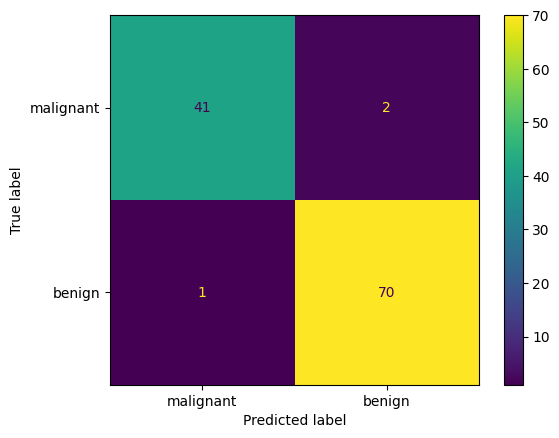

In [11]:
CM = confusion_matrix(y_test, predection)
print(classification_report(y_test, predection))
dis = ConfusionMatrixDisplay(CM, display_labels=load_breast_cancer().target_names)
dis.plot()

<font face="Rage" size=7 color='black'><i>Choosing the best hyperparameters for <b>RandomForest<b> <i> <font>

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
parameters = {'max_depth':[2,4,10,30,100], 'min_samples_split':[2,5,10,20,50], 'n_estimators':[10,50,100,200]}
grid = GridSearchCV(model,parameters)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 10}


<font face="Rage" size=7 color='black'><i>Random Forest Classifier<i> <font>

In [13]:
model = RandomForestClassifier(max_depth=grid.best_params_['max_depth'],min_samples_split=grid.best_params_['min_samples_split'],n_estimators=grid.best_params_['n_estimators'])
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
predection = model.predict(X_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')
print(f'F-Score: {f1_score(y_test, predection)}')

Val Accuracy: 0.9343065693430657
Test Accuracy: 0.956140350877193
F-Score: 0.965034965034965


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



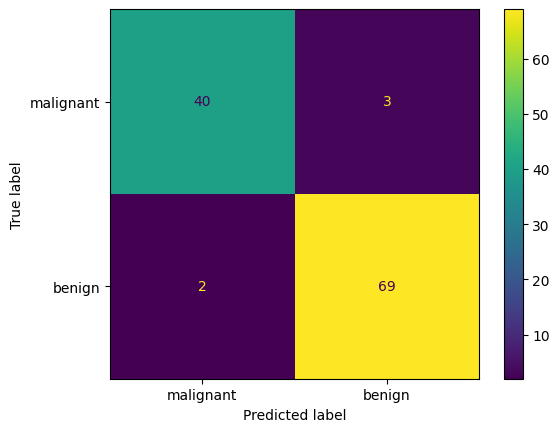

In [14]:
CM = confusion_matrix(y_test, predection)
print(classification_report(y_test, predection))
dis = ConfusionMatrixDisplay(CM, display_labels=load_breast_cancer().target_names)
dis.plot()

<font face="Rage" size=7 color='black'><i>XGB Classifier<i> <font>

In [15]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
predection = model.predict(X_test)
print(f'Val Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, predection)}')
print(f'F-Score: {f1_score(y_test, predection)}')

Val Accuracy: 0.9708029197080292
Test Accuracy: 0.9736842105263158
F-Score: 0.979020979020979


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



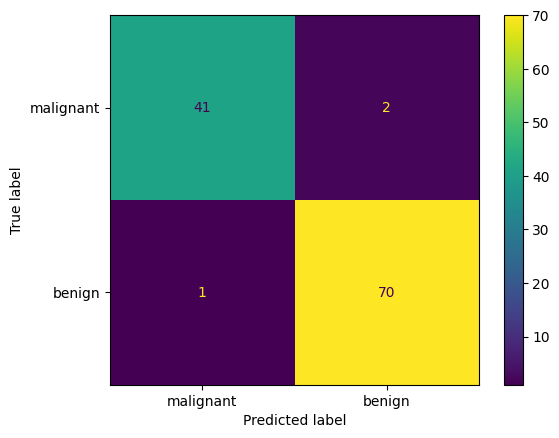

In [16]:
CM = confusion_matrix(y_test, predection)
print(classification_report(y_test, predection))
dis = ConfusionMatrixDisplay(CM, display_labels=load_breast_cancer().target_names)
dis.plot()

<font face="Rage" size=7 color='black'><i>Checking XGBClassifier<i> <font>

In [17]:
wrong = np.where(y_test != predection)
print(wrong[0])

[ 8 20 77]


In [18]:
print(f' Actual vs Prediction(wrong example): {y_test[wrong[0][0]]}, {predection[wrong[0][0]]}')#cause it's a tuple
from random import randint
index = randint(0, len(y_test))
print(f' Actual vs Prediction(random example): {y_test[index]}, {predection[index]}')

 Actual vs Prediction(wrong example): 1, 0
 Actual vs Prediction(random example): 0, 0



<font face="Rage" size=6 color='black'><i>
**I used Three Models:**
<b><i> <font>

* <font face="Rage" size=4 color='purple'><i> Logistic Regression<b><i> <font>
*  <font face="Rage" size=4 color='purple'><i>Random Forest<b><i> <font>
*  <font face="Rage" size=4 color='purple'><i>XGBoost <b><i> <font>



*  <font face="Rage" size=5 color='black'><i> **Best Accuracy: 97.368%   (For both Logistic Regression, XGBoost)**<i> <font>
*   <font face="Rage" size=5 color='black'><i>**Worst Accuracy: 95.614%**<i> <font>






